# Introduction to Data Science
## Homework 4: Due printed out in Kevin's Mailbox 5pm May 1st
## This assignment is OPTIONAL!! If you do it, your HW grade will be the average of all 4

Student Name: Roshan Kumar 

Student Netid: rk3110
***

### Part 1: Naive Bayes

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

###### Answer
Laplace smoothing helps in case there is a word in test document which is not present in training documents. In such a case the probability of that document being in any class becomes 0(impossible). We avoid laplace smoothing to avoid such situations.

### Part 2: Text classification for sentiment analysis
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1\. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
data = pd.read_csv('data/imdb.csv')

# sample data
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [2]:
# Code here
data['Class'] = data.apply(lambda x: 1 if x['Class']=='P' else 0, axis=1)
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training.

In [3]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']
print type(X)
print X.shape
print Y.shape

# Make the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

<class 'pandas.core.series.Series'>
(8500L,)
(8500L,)


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vectorizer = CountVectorizer(binary=True,stop_words='english',ngram_range=(1,2))
X_train_binary = binary_vectorizer.fit_transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_binary.shape

(6375, 571987)

4\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

In [5]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

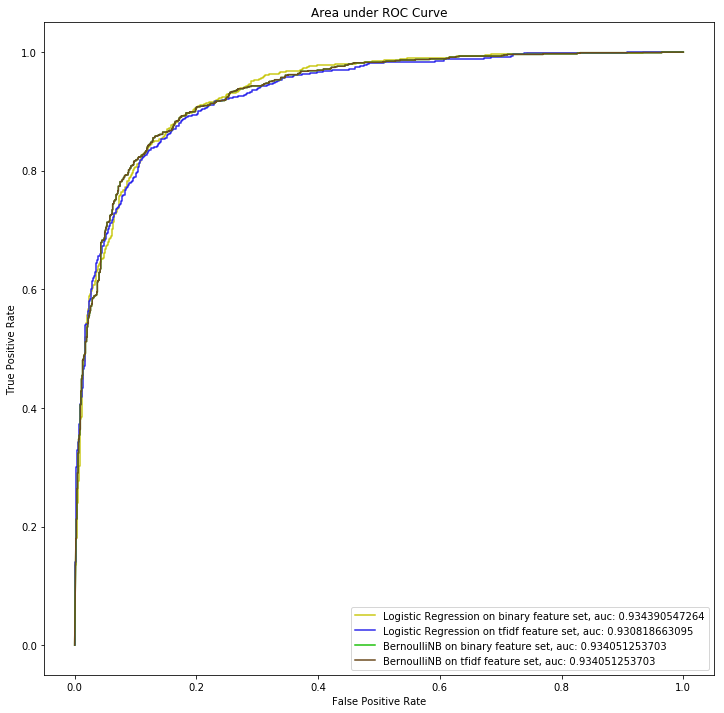

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import numpy as np

# Code here
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under ROC Curve")
# LogisticRegression
clf = LogisticRegression()
for train,test,feature_type in [(X_train_binary, X_test_binary, 'binary'), (X_train_tfidf, X_test_tfidf, 'tfidf')]:
    clf.fit(train, Y_train)
    # get probability of 1s
    predictions = clf.predict_proba(test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
    score = metrics.roc_auc_score(Y_test, predictions)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label="Logistic Regression on " + feature_type + " feature set, auc: "+ str(score))

clf = BernoulliNB()
for train, test, feature_type in [(X_train_binary, X_test_binary, 'binary'), (X_train_tfidf, X_test_tfidf, 'tfidf')]:
    clf.fit(train, Y_train)
    # get probability of 1s
    predictions = clf.predict_proba(test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
    score = metrics.roc_auc_score(Y_test, predictions)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label="BernoulliNB on " + feature_type + " feature set, auc: "+ str(score))

plt.legend(loc="lower right")

###### Answer:
Clearly, Logistic Regression on binary feature set does the best since it has highest auc socre. Logistic regression performs better than BernoulliNB since Naive bayes assumes that the fearures(words here) are independent of each other. However the words do not appear independently but the word being used depends on context and the previous words. Hence Bernoulli performs poorly. 

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. List the text below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [7]:
# Code here to display 5 incorrect reviews.
clf = LogisticRegression()
clf.fit(X_train_binary, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predictions = clf.predict(X_test_binary)

# Code here to display 5 incorrect reviews.
positives = np.where(Y_test==1)[0]
incorrect_idx=np.where(predictions[positives]!=Y_test[positives])[0]
# 5 incorrectly classified reviews
#print X_test[incorrect_idx]
count=1
for i in range(len(predictions)):
    if Y_test.iloc[i]==1 and predictions[i]!=1:
        print "review: \n", X_test.iloc[i]
        count+=1
        if(count==6): break
#print X_test

review: 
'An unusually straight-faced actioner played by a cast and filmed by a director who obviously took the material seriously. Imperfect as is to be expected from a film clearly shot on a tight budget but the drama is involving-- its one of those films that when it gets repeated ad nauseum on Cinemax 2 or More Max or whatever they call it you end up watching 40 minute blocks when youre supposed to be going to work. Along W/ Deathstalker 2 Chopping Mall and The Assault a reminder that Wynorski is a much more talented director than many of his fellow low-budget brethern who has a real ability to pace a genre film when he actuallys interested in the material (i.e. dont bother watching any of his Shannon Tweed flicks with a 3 or a 4 after the title!) Actors whove had too little to do recently (Mancuso Ford even Gary Sandy for chrissakes) really put their all into some of their best roles in years -- as for Grieco he has the right look although his acting is a bit one-note -- its clear

###### Answer
Clearly, some of the wrong predcitions.  
The third prediction which the model got incorrect has a lot of negative words such as "awful the jokes were soo bad", "my head still hurt", "could play dumb dumb" etc. But the overall rating is postive. Thus the model got tricked into wrong prediction.
